# ----------------------------------------------------------
# 🏥 Hospital AI Decision Support System (Jupyter Notebook Edition)
# ----------------------------------------------------------

In [3]:
import os
import json
import joblib
import numpy as np
import pandas as pd

In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.7 MB/s eta 0:00:00


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
cd/content/drive/MyDrive/SED698-WorkshopAI/project

/content/drive/MyDrive/SED698-WorkshopAI/project


In [14]:
ls

 app.py                     features_multi.json
 apriori_rules_fatal.pkl   ' hospital_ai_notebook.ipynb'
 apriori_rules_minor.pkl    kmeans_cluster_model.pkl
 apriori_rules_severe.pkl   predict_catboost_multi.pkl
 catboost_metrics.json      requirements.txt
 encoders_multi.pkl         scaler_cluster.pkl


In [18]:
df_org = pd.read_csv("is2025.csv")

/tmp/ipython-input-4162587472.py:1: DtypeWarning: Columns (10,12,19,35,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df_org = pd.read_csv("is2025.csv")


In [19]:
df = df_org.copy()
df.head()

,prov,sex,age,occu,occu_t,adate,atime,hdate,htime,aplace,...,rdate,mass_casualty,head_injury,home,kratom,cannabis,sedative_drug,amphetamine,drugs,risk2_etc
0,อุบลราชธานี,1,38.0,N,NaN,13/4/2568 17:30,13/4/2568 17:30,13/4/2568 18:00,13/4/2568 18:00,34.0,...,NaN,0,0,1,0,0,0,0,0,0
1,อุบลราชธานี,1,39.0,N,NaN,13/4/2568 0:00,13/4/2568 0:00,13/4/2568 20:29,13/4/2568 20:29,34.0,...,NaN,0,0,1,0,0,0,0,0,0
2,ศรีสะเกษ,1,73.0,N,NaN,16/4/2568 16:50,16/4/2568 16:50,16/4/2568 17:05,16/4/2568 17:05,33.0,...,NaN,0,1,1,0,0,0,0,0,0
3,อุบลราชธานี,1,10.0,N,NaN,12/4/2568 18:00,12/4/2568 18:00,12/4/2568 18:49,12/4/2568 18:49,34.0,...,NaN,0,0,1,0,0,0,0,0,0
4,อุบลราชธานี,1,58.0,N,NaN,14/4/2568 9:50,14/4/2568 9:50,14/4/2568 11:26,14/4/2568 11:26,34.0,...,NaN,0,1,1,0,0,0,0,0,0


In [20]:
df.shape

(420182, 48)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420182 entries, 0 to 420181
Data columns (total 48 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   prov           419619 non-null  object 
 1   sex            420182 non-null  int64  
 2   age            420159 non-null  float64
 3   occu           418933 non-null  object 
 4   occu_t         30455 non-null   object 
 5   adate          420182 non-null  object 
 6   atime          420153 non-null  object 
 7   hdate          420182 non-null  object 
 8   htime          420180 non-null  object 
 9   aplace         419981 non-null  float64
 10  aampur         419142 non-null  object 
 11  apoint         420140 non-null  object 
 12  injby          419787 non-null  object 
 13  injoccu        419362 non-null  object 
 14  cause          420182 non-null  int64  
 15  injp           400169 non-null  object 
 16  injt           409226 non-null  object 
 17  injt_t         6556 non-null 

In [15]:
# import streamlit as st # ตัด streamlit ออกเพราะรันไม่ได้ใน notebook
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ตั้งค่าให้ matplotlib แสดงผลได้เหมาะสม
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (6, 4)
print("✅ Libraries Loaded Successfully.")

✅ Libraries Loaded Successfully.


In [23]:
# ----------------------------------------------------------
# 📦 Load Models + Configs (Simulation for Notebook)
# ----------------------------------------------------------

# 💡 Function to simulate loading and handle missing files
def load_all_notebook():
    print("⏳ Attempting to Load Models...")

    # 🔹 CatBoost Model (Simulation)
    try:
        model = joblib.load("predict_catboost_multi.pkl")
        print("✅ Clinical Severity Model Loaded.")
    except Exception as e:
        # จำลองเป็นโมเดล CatBoost เปล่า (ต้องใช้ class จริงเพื่อให้รัน predict_proba ได้)
        # หากไม่มีไฟล์จริง จะกำหนดให้เป็น None และต้องจัดการตอนเรียกใช้งาน
        model = None
        print(f"❌ predict_catboost_multi.pkl NOT FOUND. (Error: {e}) -> Using None")

    # 🔹 Encoders / Features / K-Means / Apriori (Simulation)
    try:
        encoders = joblib.load("encoders_multi.pkl")
    except: encoders = None

    try:
        with open("features_multi.json", "r") as f: features = json.load(f)
    except: features = ['age', 'sex', 'is_night', 'head_injury', 'mass_casualty', 'risk1', 'risk2', 'risk3', 'risk4', 'risk5', 'cannabis', 'amphetamine', 'drugs', 'activity', 'aplace', 'prov'] # ใช้รายการ features ตัวอย่าง

    try:
        kmeans = joblib.load("kmeans_cluster_model.pkl")
        scaler = joblib.load("scaler_cluster.pkl")
    except: kmeans, scaler = None, None

    try:
        rules_minor = joblib.load("apriori_rules_minor.pkl")
        rules_severe = joblib.load("apriori_rules_severe.pkl")
        rules_fatal = joblib.load("apriori_rules_fatal.pkl")
    except: rules_minor, rules_severe, rules_fatal = pd.DataFrame(), pd.DataFrame(), pd.DataFrame() # ใช้ DataFrame เปล่าแทน

    return model, encoders, features, kmeans, scaler, rules_minor, rules_severe, rules_fatal

# เรียกใช้การโหลด
model, encoders, features, kmeans, scaler, rules_minor, rules_severe, rules_fatal = load_all_notebook()

# ----------------------------------------------------------
# 🧩 Manual Mappings
# ----------------------------------------------------------
activity_mapping = {
    "0": "เดินเท้า", "1": "โดยสารพาหนะสาธารณะ", "2": "โดยสารพาหนะส่วนบุคคล",
    "3": "ขับขี่พาหนะส่วนบุคคล", "4": "ทำงาน", "5": "เล่นกีฬา", "6": "กิจกรรมอื่น ๆ"
}
aplace_mapping = {
    "10": "บ้านพักอาศัย", "11": "ถนน/ทางหลวง", "12": "สถานที่ทำงาน",
    "13": "โรงเรียน/สถาบันศึกษา", "14": "พื้นที่สาธารณะ", "15": "อื่น ๆ"
}
prov_mapping = {
    "10": "กรุงเทพมหานคร", "20": "เชียงใหม่", "30": "ขอนแก่น",
    "40": "ภูเก็ต", "50": "นครราชสีมา", "60": "สงขลา", "99": "อื่น ๆ"
}
severity_map = {0: "เสี่ยงน้อย", 1: "เสี่ยงปานกลาง", 2: "เสี่ยงมาก"}
advice_map = {
    "เสี่ยงน้อย": "ดูแลอาการทั่วไป เฝ้าระวังซ้ำทุก 15–30 นาที",
    "เสี่ยงปานกลาง": "ส่งตรวจเพิ่มเติม ให้สารน้ำ / ยาแก้ปวด / เฝ้าสัญญาณชีพใกล้ชิด",
    "เสี่ยงมาก": "แจ้งทีมสหสาขา เปิดทางเดินหายใจ เตรียมห้องฉุกเฉินหรือส่งต่อด่วน"
}
triage_color = {
    "เสี่ยงน้อย": "#4CAF50", "เสี่ยงปานกลาง": "#FFC107", "เสี่ยงมาก": "#F44336"
}

print("✅ Mappings Loaded.")

⏳ Attempting to Load Models...
✅ Clinical Severity Model Loaded.
✅ Mappings Loaded.


In [24]:
# ----------------------------------------------------------
# 🧠 Input Simulation (แทนที่ Streamlit Input Form)
# ----------------------------------------------------------

# 📋 กำหนดค่า Input สำหรับทดสอบ (สามารถเปลี่ยนค่าเหล่านี้เพื่อทดสอบเคสต่าง ๆ)
age = 55
sex = "ชาย"
is_night = True
head_injury = True
mass_casualty = False
risk1 = True     # ไม่สวมหมวกนิรภัย / เข็มขัดนิรภัย
risk2 = False    # ขับรถเร็ว / ประมาท
risk3 = True     # เมา / ดื่มสุรา
risk4 = False    # ผู้สูงอายุ / เด็กเล็ก
risk5 = True     # บาดเจ็บหลายตำแหน่ง
cannabis = False
amphetamine = False
drugs = False
activity = activity_mapping["3"] # ขับขี่พาหนะส่วนบุคคล
aplace = aplace_mapping["11"]   # ถนน/ทางหลวง
prov = prov_mapping["10"]       # กรุงเทพมหานคร
submit = True # จำลองว่ามีการกดปุ่ม submit

# ----------------------------------------------------------
# 🧩 Preprocess Function (เหมือนเดิม)
# ----------------------------------------------------------
def preprocess_input(data_dict):
    df = pd.DataFrame([data_dict])
    reverse_activity = {v: k for k, v in activity_mapping.items()}
    reverse_aplace = {v: k for k, v in aplace_mapping.items()}
    reverse_prov = {v: k for k, v in prov_mapping.items()}

    # Mapping
    if df.at[0, "activity"] in reverse_activity:
        df.at[0, "activity"] = reverse_activity[df.at[0, "activity"]]
    if df.at[0, "aplace"] in reverse_aplace:
        df.at[0, "aplace"] = reverse_aplace[df.at[0, "aplace"]]
    if df.at[0, "prov"] in reverse_prov:
        df.at[0, "prov"] = reverse_prov[df.at[0, "prov"]]

    # Type Conversion
    for col in [
        "age", "sex", "is_night", "head_injury", "mass_casualty",
        "risk1", "risk2", "risk3", "risk4", "risk5",
        "cannabis", "amphetamine", "drugs"
    ]:
        df[col] = df[col].astype(float)

    # Encoding (Simplified if encoders are not available)
    for col in ["activity", "aplace", "prov"]:
        val = str(df.at[0, col])
        if encoders and col in encoders:
            le = encoders[col]
            if val in le.classes_:
                df[col] = le.transform([val])[0]
            else:
                df[col] = 0
        else:
            df[col] = int(val) # ใช้ค่า string/int เดิม ถ้าไม่มี encoder

    # Feature Engineering
    if "age_group_60plus" not in df.columns:
        df["age_group_60plus"] = (df["age"] >= 60).astype(int)
    if "risk_count" not in df.columns:
        df["risk_count"] = df[["risk1","risk2","risk3","risk4","risk5"]].sum(axis=1)
    if "night_flag" not in df.columns:
        df["night_flag"] = df["is_night"].astype(int)

    # Reindex and Fill
    df = df.reindex(columns=features, fill_value=0)
    return df

print("✅ Input Simulated and Preprocess Function Ready.")

✅ Input Simulated and Preprocess Function Ready.


In [25]:
# ----------------------------------------------------------
# 🧠 TAB 1 — CatBoost Prediction
# ----------------------------------------------------------

if submit:
    print("--- 🧠 Clinical Severity Prediction ---")

    # 1. จัดรูปแบบ Input Data
    input_data = {
        "age": age,
        "sex": 1 if sex == "ชาย" else 0, # Male=1, Female=0
        "is_night": int(is_night),
        "head_injury": int(head_injury),
        "mass_casualty": int(mass_casualty),
        "risk1": int(risk1), "risk2": int(risk2), "risk3": int(risk3),
        "risk4": int(risk4), "risk5": int(risk5),
        "cannabis": int(cannabis), "amphetamine": int(amphetamine), "drugs": int(drugs),
        "activity": activity, "aplace": aplace, "prov": prov
    }

    # 2. Preprocess
    X_input = preprocess_input(input_data)

    # 3. Predict
    if model is not None:
        try:
            probs = model.predict_proba(X_input)[0]
            pred_class = int(np.argmax(probs))
            label = severity_map.get(pred_class, "ไม่ทราบ")
            color = triage_color.get(label, "#2196F3")

            # 4. แสดงผล (ใน Notebook)
            print(f"📋 ข้อมูล: อายุ {age} ปี, เพศ {sex}, กลางคืน={is_night}, เมาแล้วขับ={risk3}, บาดเจ็บหลายตำแหน่ง={risk5}")
            print("---")
            print(f"🔥 ระดับความเสี่ยงที่คาดการณ์: {label}")
            print(f"💡 แนวทางทางการแพทย์เบื้องต้น: {advice_map[label]}")
            print(f"🧠 ความมั่นใจของระบบ: {probs[pred_class]*100:.1f}% (Probabilities: {probs})")

            # 5. บันทึก Prediction Log (เตรียมไว้สำหรับ Dashboard)
            log_file = "prediction_log.csv"
            new_row = pd.DataFrame([{
                "timestamp": pd.Timestamp.now(),
                "age": age,
                "sex": sex,
                "predicted_severity": label
            }])
            if os.path.exists(log_file):
                new_row.to_csv(log_file, mode="a", index=False, header=False)
            else:
                new_row.to_csv(log_file, index=False)
            print("📁 บันทึกผลการประเมินเข้าสู่ระบบ Log แล้ว")

        except Exception as e:
            label = "ไม่ทราบ"
            print(f"❌ Error ในการทำนาย: {e}. (อาจเป็นเพราะไฟล์โมเดล CatBoost ไม่สมบูรณ์)")

    else:
        label = "ไม่ทราบ"
        print("⚠️ โมเดลหลัก (CatBoost) ไม่พร้อมใช้งาน ไม่สามารถทำนายได้")

# ----------------------------------------------------------
# 💡 เตรียมตัวแปรสำหรับ Cell ถัดไป
# ----------------------------------------------------------
current_label = label
current_age = age
current_sex = sex
current_risk_1 = risk1
current_risk_2 = risk2
current_risk_3 = risk3
current_risk_4 = risk4
current_risk_5 = risk5

--- 🧠 Clinical Severity Prediction ---
📋 ข้อมูล: อายุ 55 ปี, เพศ ชาย, กลางคืน=True, เมาแล้วขับ=True, บาดเจ็บหลายตำแหน่ง=True
---
🔥 ระดับความเสี่ยงที่คาดการณ์: เสี่ยงปานกลาง
💡 แนวทางทางการแพทย์เบื้องต้น: ส่งตรวจเพิ่มเติม ให้สารน้ำ / ยาแก้ปวด / เฝ้าสัญญาณชีพใกล้ชิด
🧠 ความมั่นใจของระบบ: 99.6% (Probabilities: [4.08325560e-05 9.96251608e-01 3.70755943e-03])
📁 บันทึกผลการประเมินเข้าสู่ระบบ Log แล้ว


In [26]:
# ----------------------------------------------------------
# 👥 TAB 2 — K-Means Cluster Analysis
# ----------------------------------------------------------

if submit and kmeans is not None and scaler is not None and model is not None:
    print("\n--- 👥 Patient Segmentation ---")
    print(f"🧾 ข้อมูล: อายุ {current_age} ปี, เพศ {current_sex}, ระดับความเสี่ยง: {current_label}")

    # 1. เตรียมข้อมูลสำหรับ Clustering
    if hasattr(scaler, "feature_names_in_"):
        valid_cols = scaler.feature_names_in_
        # พยายามเลือกเฉพาะ features ที่ scaler ต้องการ
        X_cluster = X_input[[c for c in valid_cols if c in X_input.columns]]
    else:
        # หากไม่มี feature names ให้เลือกทุกคอลัมน์ที่เป็นตัวเลข
        X_cluster = X_input.select_dtypes(include=[np.number])

    if not X_cluster.empty:
        # 2. Scaling และ Predict Cluster
        X_scaled = scaler.transform(X_cluster)
        cluster_label = int(kmeans.predict(X_scaled)[0])

        # 3. แสดงผล
        cluster_desc = {
            0: "👵 กลุ่มผู้สูงอายุ / ลื่นล้มในบ้าน → ความเสี่ยงต่ำ",
            1: "🚗 กลุ่มวัยทำงาน / เมา / ขับรถเร็ว → ความเสี่ยงสูง",
            2: "⚽ กลุ่มเด็กและวัยรุ่น / เล่นกีฬา → ความเสี่ยงปานกลาง",
            3: "👷 กลุ่มแรงงาน / ก่อสร้าง → ความเสี่ยงสูง",
            4: "🙂 กลุ่มทั่วไป / ไม่มีปัจจัยเด่น → ความเสี่ยงต่ำ"
        }

        print(f"\n### 📊 ผลการจัดกลุ่มผู้บาดเจ็บ: Cluster {cluster_label}")
        print(f"💡 คำอธิบายกลุ่ม: {cluster_desc.get(cluster_label, 'ยังไม่มีคำอธิบายกลุ่มนี้')}")
        print("---")
    else:
        print("⚠️ ข้อมูลสำหรับ Clustering ไม่เพียงพอ หรือรูปแบบไม่ถูกต้อง")
else:
    print("\n⚠️ โมเดล K-Means / Scaler ไม่พร้อมใช้งาน หรือยังไม่ได้ทำนายใน Cell 4")


--- 👥 Patient Segmentation ---
🧾 ข้อมูล: อายุ 55 ปี, เพศ ชาย, ระดับความเสี่ยง: เสี่ยงปานกลาง

### 📊 ผลการจัดกลุ่มผู้บาดเจ็บ: Cluster 0
💡 คำอธิบายกลุ่ม: 👵 กลุ่มผู้สูงอายุ / ลื่นล้มในบ้าน → ความเสี่ยงต่ำ
---


In [27]:
# ----------------------------------------------------------
# 🧩 TAB 3 — Apriori Risk Association
# ----------------------------------------------------------
print("\n--- 🧩 Risk Association Analysis ---")

# 1. ฟังก์ชันแปลง frozenset → คำอ่านง่าย
def decode_set(x):
    if isinstance(x, (frozenset, set)):
        replacements = {
            "risk1": "ไม่สวมหมวกนิรภัย/เข็มขัดนิรภัย", "risk2": "ขับรถเร็ว/ประมาท", "risk3": "เมาแล้วขับ",
            "risk4": "ผู้สูงอายุ/เด็กเล็ก", "risk5": "บาดเจ็บหลายตำแหน่ง", "head_injury": "บาดเจ็บที่ศีรษะ",
            "mass_casualty": "เหตุการณ์หมู่", "cannabis": "พบกัญชาในร่างกาย", "amphetamine": "พบแอมเฟตามีนในร่างกาย",
            "drugs": "พบยาอื่น ๆ ในร่างกาย", "sex": "เพศชาย", "age60plus": "อายุมากกว่า 60 ปี"
        }
        readable = [replacements.get(str(i), str(i)) for i in list(x)]
        return ", ".join(readable)
    return str(x)

# 2. เลือกชุดกฎตามผลการทำนาย
df_rules = pd.DataFrame()

if current_label == "เสี่ยงน้อย":
    df_rules = rules_minor.copy()
elif current_label == "เสี่ยงปานกลาง":
    df_rules = rules_severe.copy()
elif current_label == "เสี่ยงมาก":
    df_rules = rules_fatal.copy()

if not df_rules.empty:
    df_rules = df_rules.head(5) # เลือก 5 อันดับแรก
    df_rules["antecedents"] = df_rules["antecedents"].apply(decode_set)
    df_rules["consequents"] = df_rules["consequents"].apply(decode_set)

    # 3. แสดงผล Insight หลัก
    if not df_rules.empty:
        top_rule = df_rules.iloc[0]
        print(f"💡 Insight (อิงจากผลการทำนาย '{current_label}'):")
        print(f"ผู้ที่มี {top_rule['antecedents']} มักมีแนวโน้ม {top_rule['consequents']}")
        print(f"(Confidence: {top_rule['confidence']*100:.1f}%, Lift: {top_rule['lift']:.2f})")

    # 4. แสดงตารางกฎ
    print("\n📚 ตารางกฎ Risk Association Top 5:")
    display(df_rules[["antecedents", "consequents", "support", "confidence", "lift"]])
else:
    print(f"📭 ยังไม่มีกฎ Apriori สำหรับความเสี่ยงระดับ '{current_label}'")


--- 🧩 Risk Association Analysis ---
💡 Insight (อิงจากผลการทำนาย 'เสี่ยงปานกลาง'):
ผู้ที่มี พบแอมเฟตามีนในร่างกาย มักมีแนวโน้ม ขับรถเร็ว/ประมาท
(Confidence: 100.0%, Lift: 228.28)

📚 ตารางกฎ Risk Association Top 5:


,antecedents,consequents,support,confidence,lift
18,พบแอมเฟตามีนในร่างกาย,ขับรถเร็ว/ประมาท,0.000538,1.000000,228.278308
60,"บาดเจ็บที่ศีรษะ, ขับรถเร็ว/ประมาท, เพศชาย",ไม่สวมหมวกนิรภัย/เข็มขัดนิรภัย,0.000986,0.376712,2.105643
41,"ขับรถเร็ว/ประมาท, เพศชาย",ไม่สวมหมวกนิรภัย/เข็มขัดนิรภัย,0.001297,0.370940,2.073379
62,"ขับรถเร็ว/ประมาท, เพศชาย","บาดเจ็บที่ศีรษะ, ไม่สวมหมวกนิรภัย/เข็มขัดนิรภัย",0.000986,0.282051,2.071322
64,"บาดเจ็บที่ศีรษะ, ขับรถเร็ว/ประมาท","เพศชาย, ไม่สวมหมวกนิรภัย/เข็มขัดนิรภัย",0.000986,0.297834,1.932225



--- 📊 Clinical Summary & Insights ---
📁 โหลดข้อมูลสำเร็จ: 1 รายการ

### 💡 ภาพรวมสถานการณ์ (KPI Overview)
- จำนวนเคสทั้งหมด: 1
- สัดส่วนผู้บาดเจ็บรุนแรง: 0.0%
- สัดส่วน เพศชาย : หญิง: 100.0% : 0.0%

### 🩸 สัดส่วนผู้บาดเจ็บตามระดับความเสี่ยง (Pie Chart)


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3604 (\N{THAI CHARACTER DO DEK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3633 (\N{THAI CHARACTER MAI HAN-AKAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 3610 (\N{THAI CHARACTER BO BAIMAI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_i

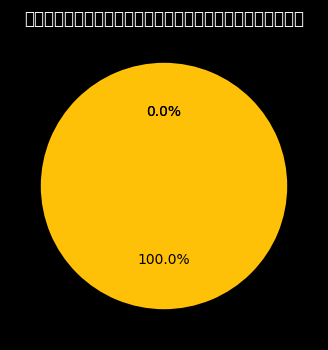


### 🩺 Insight ทางคลินิก & ข้อเสนอเชิงกลยุทธ์
📊 สรุปสถานการณ์ปัจจุบัน: กลุ่มผู้บาดเจ็บส่วนใหญ่มีความเสี่ยงปานกลาง ควรเน้นการติดตามอาการและประเมินซ้ำ
💡 ใช้ข้อมูลนี้เพื่อสนับสนุนการจัดลำดับความสำคัญและบริหารทรัพยากรโรงพยาบาล


In [28]:
# ----------------------------------------------------------
# 📊 TAB 4 — Clinical Summary & Insights Dashboard
# ----------------------------------------------------------
print("\n--- 📊 Clinical Summary & Insights ---")

log_file = "prediction_log.csv"

# 1. โหลดข้อมูล Log
if os.path.exists(log_file):
    df_log = pd.read_csv(log_file)
    print(f"📁 โหลดข้อมูลสำเร็จ: {len(df_log):,} รายการ\n")
else:
    print("⚠️ ยังไม่มีข้อมูลจากการทำนาย (prediction_log.csv) ให้รัน Cell 4 เพื่อสร้างข้อมูลก่อน")
    df_log = pd.DataFrame(columns=["timestamp", "age", "sex", "predicted_severity"])

total_cases = len(df_log)

if total_cases > 0:
    # 2. KPI Overview
    print("### 💡 ภาพรวมสถานการณ์ (KPI Overview)")
    severe_ratio = df_log["predicted_severity"].eq("เสี่ยงมาก").mean() * 100
    male_ratio = (df_log["sex"] == "ชาย").mean() * 100
    female_ratio = (df_log["sex"] == "หญิง").mean() * 100

    print(f"- จำนวนเคสทั้งหมด: {total_cases:,}")
    print(f"- สัดส่วนผู้บาดเจ็บรุนแรง: {severe_ratio:.1f}%")
    print(f"- สัดส่วน เพศชาย : หญิง: {male_ratio:.1f}% : {female_ratio:.1f}%\n")

    # 3. Distribution by Severity (Pie Chart)
    print("### 🩸 สัดส่วนผู้บาดเจ็บตามระดับความเสี่ยง (Pie Chart)")

    # ใช้ matplotlib/seaborn สร้างกราฟ
    fig, ax = plt.subplots()
    colors = ['#4CAF50', '#FFC107', '#F44336']

    # ต้องมั่นใจว่า Severity ครบ 3 ระดับ
    severity_counts = df_log['predicted_severity'].value_counts().reindex(severity_map.values(), fill_value=0)

    ax.pie(
        severity_counts,
        labels=severity_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=[triage_color.get(l) for l in severity_counts.index],
        textprops={'color': 'black', 'fontsize': 10}
    )
    ax.set_title("ระดับความรุนแรงของผู้บาดเจ็บ")
    plt.show()

    # 4. Insight Summary
    print("\n### 🩺 Insight ทางคลินิก & ข้อเสนอเชิงกลยุทธ์")
    top_severity = df_log["predicted_severity"].value_counts().idxmax()

    if top_severity == "เสี่ยงมาก":
        msg = "มีแนวโน้มผู้บาดเจ็บรุนแรงสูง ควรจัดสรรทีมฉุกเฉินและทรัพยากรเพิ่มในช่วงเวลาที่พบเคสสูงสุด"
    elif top_severity == "เสี่ยงปานกลาง":
        msg = "กลุ่มผู้บาดเจ็บส่วนใหญ่มีความเสี่ยงปานกลาง ควรเน้นการติดตามอาการและประเมินซ้ำ"
    else:
        msg = "ส่วนใหญ่เป็นกลุ่มความเสี่ยงต่ำ สามารถใช้แนวทางป้องกันและให้ความรู้ประชาชน"

    print(f"📊 สรุปสถานการณ์ปัจจุบัน: {msg}")
    print("💡 ใช้ข้อมูลนี้เพื่อสนับสนุนการจัดลำดับความสำคัญและบริหารทรัพยากรโรงพยาบาล")

else:
    print("📭 ไม่มีข้อมูลเพียงพอสำหรับการแสดง Dashboard")